# An example tuning the hyperparameters of SVM classifier is shown as usecase.

In [14]:
from mango.tuner import Tuner

In [2]:
from scipy.stats import uniform
from mango.domain.distribution import loguniform

param_dict = {"gamma": uniform(0.1, 4),
              "C": loguniform(-7, 7)}

# userObjective

In [3]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

iris = datasets.load_iris()

# Take only the first two features.
X = iris.data[:,:2]
Y = iris.target

def objectiveSVM(args_list):
    global X,Y
    
    results = []
    for hyper_par in args_list:
        clf = svm.SVC(**hyper_par)
        result  = cross_val_score(clf, X, Y, scoring='accuracy').mean()
        results.append(result)
    return results

In [15]:
conf_Dict = dict()
conf_Dict['batch_size'] = 3
conf_Dict['num_iteration'] = 20
conf_Dict['domain_size'] = 1000

# Defining Tuner

In [16]:
tuner_user = Tuner(param_dict, objectiveSVM, conf_Dict)

In [17]:
tuner_user.getConf()

{'param_dict': {'gamma': <scipy.stats._distn_infrastructure.rv_frozen at 0x111985a10>,
  'C': <scipy.stats._distn_infrastructure.rv_frozen at 0x1213bde10>},
 'userObjective': <function __main__.objectiveSVM(args_list)>,
 'domain_size': 1000,
 'initial_random': 1,
 'num_iteration': 20,
 'objective': 'maximize',
 'batch_size': 3,
 'optimizer': 'Bayesian'}

In [18]:
results = tuner_user.maximize()

# Inspect the results

In [19]:
print('best hyper parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best hyper parameters: {'C': 0.14141448138204452, 'gamma': 1.108381123540644}
best objective: 0.8337418300653594


In [20]:
print('Sample hyper parameters tried:',len(results['params_tried']))
print(results['params_tried'][:2])

Sample hyper parameters tried: 61
[{'C': 6.803175982928234e-06, 'gamma': 3.8760537843338168}, {'C': 1.0737868597766003e-06, 'gamma': 0.1037808098068175}]


In [21]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 61
[0.8141339869281046, 0.7732843137254902, 0.7802287581699346, 0.8141339869281046, 0.8141339869281046]


# Plotting the variation in objective values of the tried results

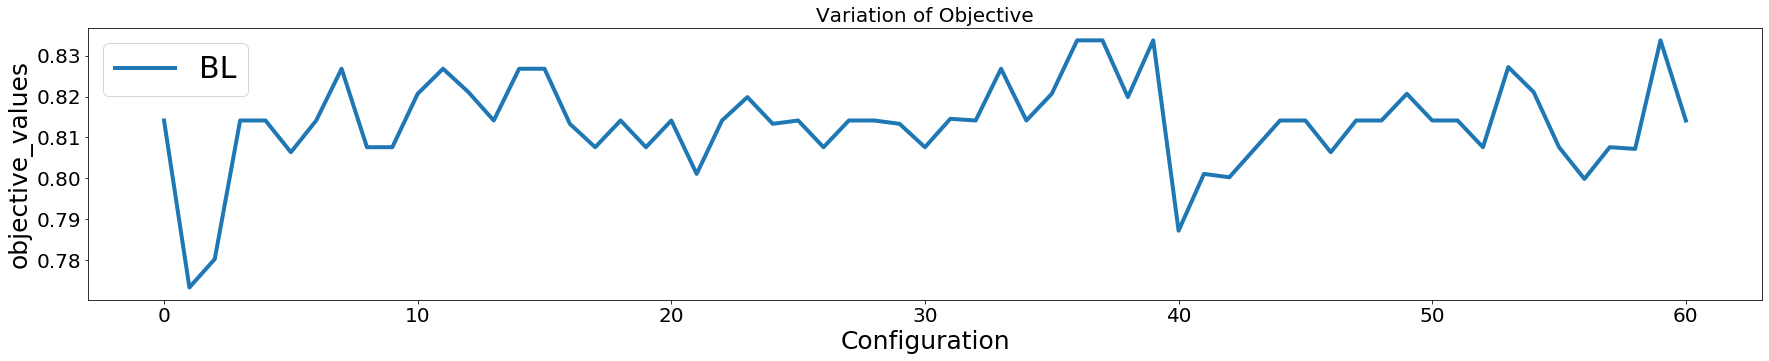

In [22]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Configuration', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

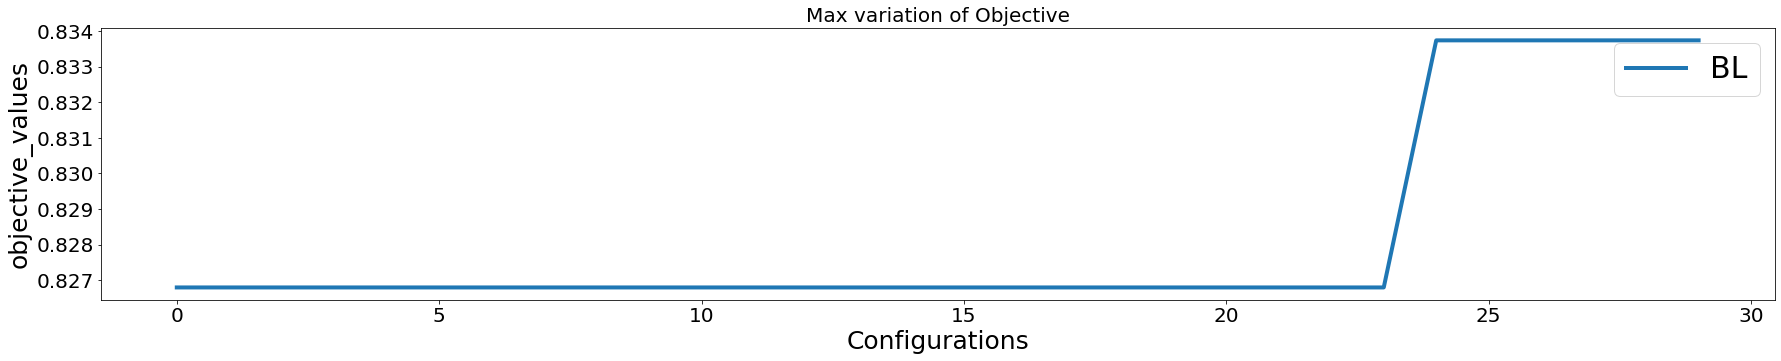

In [12]:
Size = 30 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Configurations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the Result

In [13]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_objective': 0.8337418300653594,
    'best_params': {'C': 0.15437624798108956, 'gamma': 1.109582126269499},
    'objective_values': [   0.8267973856209151,
                            0.8010620915032679,
                            0.8206699346405228,
                            0.8141339869281046,
                            0.8133169934640523,
                            0.8141339869281046,
                            0.8075980392156863,
                            0.7732843137254902,
                            0.8267973856209151,
                            0.8141339869281046,
                            0.8075980392156863,
                            0.8071895424836603,
                            0.8141339869281046,
                            0.8267973856209151,
                            0.8206699346405228,
                            0.8267973856209151,
                            0.8141339869281046,
                            0.8063725490196078,
                   